#KNN (K-Nearest Neighbors)

KNN es un algoritmo de aprendizaje automático supervisado que se utiliza para tareas de clasificación y regresión. Funciona buscando los K vecinos más cercanos a un punto de datos determinado en función de una métrica de distancia como la distancia euclidiana. El algoritmo asigna el punto de datos a la clase que es más común entre sus K vecinos más cercanos.

In [1]:
# Instalar librerías necesarias (Solo ejecutar si no están instaladas)
from IPython.utils import io
import tqdm.notebook

total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
        # Instalar rdkit
        !pip -q install rdkit.pypi==2021.9.4
        pbar.update(20)
        # Instalar Pillow
        !pip -q install Pillow
        pbar.update(40)
        # Instalar molplotly
        !pip install molplotly
        pbar.update(60)
        # Instalar jupyter-dash
        !pip install jupyter-dash
        pbar.update(80)
        # Instalar el diseño de aplicación dash
        !pip install dash-bootstrap-components
        pbar.update(100)


  0%|          | 0/100 [00:00<?, ?it/s]

In [2]:
# Importar librerías
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
# Leer bases de datos
datos = "/content/drive/MyDrive/INGER/ETAPA 2024/Version Final/0. Data Set/Concatenadas.csv"
datos = pd.read_csv(datos)

In [4]:
# Seleccionar las columnas de interés y dividir los datos en caracteristicas
columnas_interes = [1, 3, 5, 6, 7, 8, 20]
X = datos.iloc[:, columnas_interes]
y = datos.iloc[:, 44]

In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Calcular la precisión para diferentes valores de K
k_range = range(1, 31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))


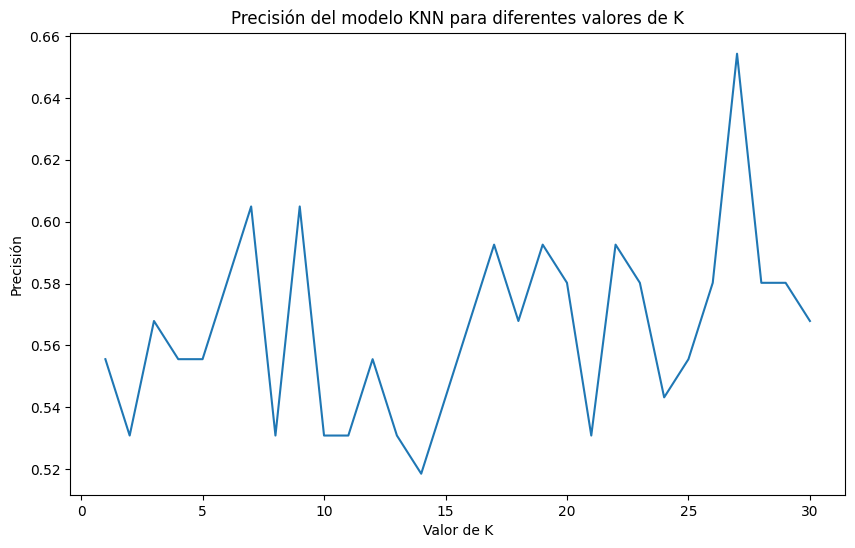

In [8]:
# Graficar la precisión vs K
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores)
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.title('Precisión del modelo KNN para diferentes valores de K')
plt.show()


In [9]:
# Encontrar el K óptimo
k_optimo = k_range[scores.index(max(scores))]
print(f"El valor óptimo de K es: {k_optimo}")

El valor óptimo de K es: 27


In [11]:
# Crear y entrenar el modelo KNN con el K óptimo
knn_optimo = KNeighborsClassifier(n_neighbors=k_optimo)
knn_optimo.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=27)

In [12]:
# Hacer predicciones
y_pred = knn_optimo.predict(X_test_scaled)


In [13]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

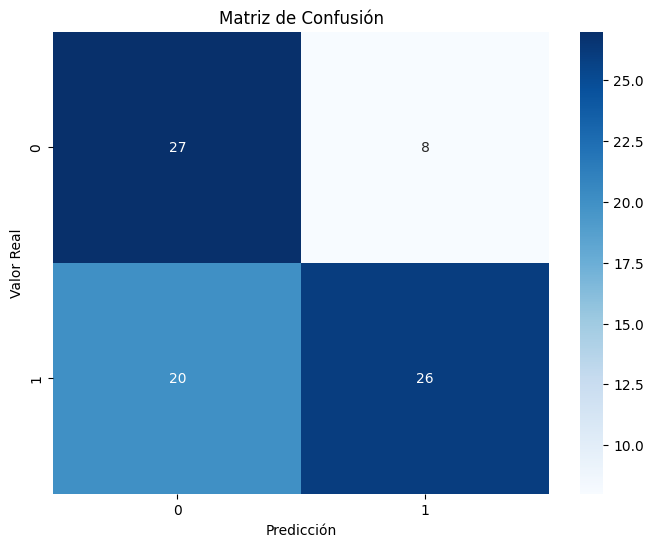

In [14]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [42]:
tp = 27
fp = 20
fn = 8
tn = 26

In [43]:
# Mostrar la precisión del modelo en el conjunto de prueba
from sklearn.metrics import accuracy_score
accuracy = (tp + tn) / (tp + fp + fn + tn)
#accuracy = accuracy_score(y_test, arbol_geros.predict(X_test))
print("Accuracy:", accuracy)

Accuracy: 0.654320987654321


In [44]:
from sklearn.metrics import confusion_matrix
# Calculate the specificity score
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.5652173913043478


In [45]:
# ### Precision (Precisión)
precision = tp / (tp + fp)
print("Precision:", precision)

# ### Recall (Sensibilidad o Exhaustividad)
recall = tp / (tp + fn)
print("Recall:", recall)

# ### F1-Score
f1 = 2 * (precision * recall) / (precision + recall)
print("F1-score:", f1)

Precision: 0.574468085106383
Recall: 0.7714285714285715
F1-score: 0.6585365853658536


In [46]:
# Realizar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

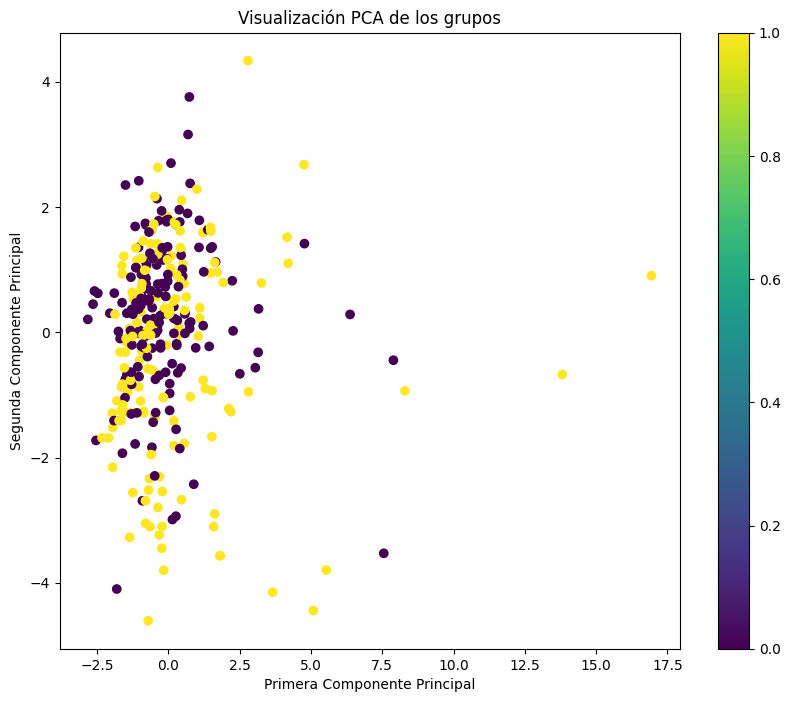

In [47]:
# Graficar los resultados del PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.colorbar(scatter)
plt.title('Visualización PCA de los grupos')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.show()

In [48]:
datos['Predicciones'] = knn_optimo.predict(scaler.transform(X))


In [49]:
datos

,Name,Total Molweight,Monoisotopic Mass,cLogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,Relative PSA,Polar Surface Area,...,Amines,Alkyl-Amines,Aromatic Amines,Aromatic Nitrogens,Basic Nitrogens,Acidic Oxygens,Geroprotectors,DataSet,Smile,Predicciones
0,"(R,R)-Cis-Diethyl Tetrahydro-2,8-Chrysenediol",320.431,320.177630,4.8318,-4.116,2,2,246.20,0.106420,40.46,...,0,0,0,0,0,0,1,Geroprotectors,CC[C@@H]1CC2=C(C=CC(=C2)O)C3=C1C4=C(C[C@H]3CC)...,1
1,"1,2,3,4,6-Penta-O-Galloyl-B-D-Glucose",940.679,940.118190,1.8357,-3.209,26,15,619.06,0.519660,444.18,...,0,0,0,0,0,0,1,Geroprotectors,Oc1cc(cc(O)c1O)C(=O)OC[C@H]1O[C@@H](OC(=O)c2cc...,1
2,10-Hydroxy-2-Decenoic Acid,186.250,186.125595,2.1572,-1.884,3,2,166.77,0.235290,57.53,...,0,0,0,0,0,1,1,Geroprotectors,C(CCC/C=C/C(=O)O)CCCO,0
3,1400W,177.250,177.126597,-0.1475,-1.874,3,2,153.05,0.274750,64.40,...,1,1,0,0,2,0,1,Geroprotectors,CC(=NCC1=CC=CC(=C1)CN)N,0
4,17-A-Estradiol,272.387,272.177630,3.8766,-4.020,2,2,200.69,0.130550,40.46,...,0,0,0,0,0,0,1,Geroprotectors,[H][C@]12CC[C@]3(C)[C@H](O)CC[C@@]3([H])[C@]1(...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,Tolcapone,273.243,273.063724,1.5205,-3.928,6,2,199.40,0.349350,103.35,...,0,0,0,0,0,0,0,NoGeroprotectors,CC1=CC=C(C=C1)C(=O)C2=CC(=C(C(=C2)O)O)[N+](=O)...,0
401,Acridine Orange,265.359,265.157897,3.0853,-3.895,3,0,210.86,0.085697,19.37,...,2,0,2,1,0,0,0,NoGeroprotectors,CN(C)C1=CC2=C(C=C1)C=C3C=CC(=CC3=N2)N(C)C,0
402,Aflatoxins,312.276,312.063390,1.6346,-3.266,6,0,208.96,0.316230,71.06,...,0,0,0,0,0,0,0,NoGeroprotectors,COC1=C2C3=C(C(=O)CC3)C(=O)OC2=C4C5C=COC5OC4=C1,0
403,Diethylstilbestrol,268.355,268.146330,4.5248,-3.158,2,2,220.68,0.118720,40.46,...,0,0,0,0,0,0,0,NoGeroprotectors,CCC(=C(CC)C1=CC=C(C=C1)O)C2=CC=C(C=C2)O,0


In [ ]:
# Guardar los resultados
datos.to_csv('resultados_modelo_KNN.csv', index=False)